In [5]:
import matplotlib.pyplot as plt

In [1]:
# lasso也是正则化的线性回归，也是约束系数使其接近于0，L1正则化，结果是使用lasso时某些系数刚好为0
# 这说明某些特征被模型完全忽略，自动化的特征选择，呈现模型最重要的特征
import mglearn
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)

/home/skyrover/repository/ml/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/skyrover/repository/ml/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
lasso.score(X_train, y_train), lasso.score(X_test, y_test)

(0.29323768991114607, 0.20937503255272316)

In [5]:
lasso = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
lasso.score(X_train, y_train), lasso.score(X_test, y_test)

(0.8965069559751289, 0.7656489887843522)

In [10]:
sum(lasso.coef_ != 0)

33

In [11]:
# 一般选择岭回归，如果特征很多，而且只有几个是重要的，所以选择Lasso更好
# 还有一个ElasticNet类，结合了Lasso和Ridge的惩罚项，但是需要调节两个参数，L1正则化和L2正则化

### 线性模型用于分类问题

In [12]:
# 学习线性模型的算法有以下区别
# 1. 系数和截距的特定组合对训练数据拟合好坏的度量方法，损失函数
# 2. 是否使用正则化，以及使用哪种正则化方法

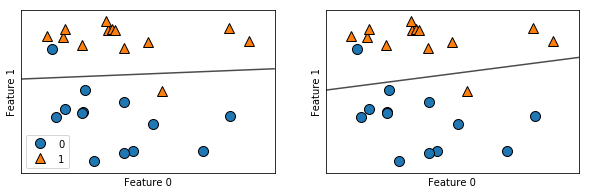

In [15]:
# Logistic回归和线性支持向量机(线性SVM)
# 两个模型默认使用L2正则化
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

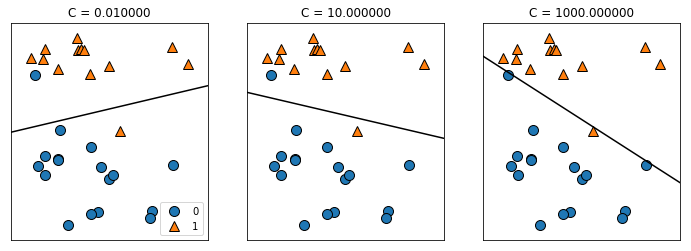

In [16]:
mglearn.plots.plot_linear_svc_regularization()
# C值是决定正则化强度的参数，C值越大，正则化越弱
# C值越大，尽可能将训练集拟合到最好，使用更多的特征，但是很容易过拟合
# 而C值越小，尽可能使用更少的特征，模型更简单，训练集的精度可能不足，也可能导致欠拟合

In [17]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
logreg = LogisticRegression().fit(X_train, y_train)
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.960093896713615, 0.958041958041958)

In [19]:
logreg = LogisticRegression(C=100).fit(X_train, y_train)
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.9694835680751174, 0.958041958041958)

In [20]:
logreg = LogisticRegression(C=0.01).fit(X_train, y_train)
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.9342723004694836, 0.9300699300699301)

In [21]:
# L2正则化，更强的正则化使得系数更趋于0，但是系数永远不会正好等于0
# 如果想要一个可解释性更强 的模型，使用L1正则化可能更好，因为它约束模型只使用少数几个特征
lr_l1 = LogisticRegression(C=10, penalty="l1").fit(X_train, y_train)
lr_l1.score(X_train, y_train), lr_l1.score(X_test, y_test)

(0.9741784037558685, 0.972027972027972)

In [1]:
# 与用于回归的线性模型一样(岭回归L2正则，LassoL1正则)，模型的主要差别在于penalty参数
# 这个参数会影响正则化，也会影响模型使用所有可用特征还是只选择特征的一个子集
# Ridge, LogisticRegression， LinerSVC使用L2正则
# Lasso使用L1正则
# 避免过拟合

In [2]:
# 多分类问题，一对其余，每个类别都学习一个二分类模型，这样就会生成与类别个数一样多的二分类模型

In [3]:
from sklearn.datasets import make_blobs
X,y = make_blobs(random_state=43)

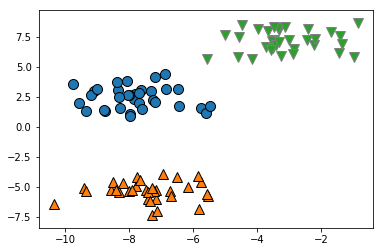

In [6]:
import mglearn
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [8]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
linear_svm.coef_, linear_svm.intercept_

(array([[-0.47480162,  0.17208369],
        [ 0.0806734 , -0.39639819],
        [ 0.5424778 ,  0.66367726]]),
 array([-3.55848669, -0.03307257,  0.01455323]))

In [11]:
import numpy as np
line = np.linspace(-15, 15)
line

array([-15.        , -14.3877551 , -13.7755102 , -13.16326531,
       -12.55102041, -11.93877551, -11.32653061, -10.71428571,
       -10.10204082,  -9.48979592,  -8.87755102,  -8.26530612,
        -7.65306122,  -7.04081633,  -6.42857143,  -5.81632653,
        -5.20408163,  -4.59183673,  -3.97959184,  -3.36734694,
        -2.75510204,  -2.14285714,  -1.53061224,  -0.91836735,
        -0.30612245,   0.30612245,   0.91836735,   1.53061224,
         2.14285714,   2.75510204,   3.36734694,   3.97959184,
         4.59183673,   5.20408163,   5.81632653,   6.42857143,
         7.04081633,   7.65306122,   8.26530612,   8.87755102,
         9.48979592,  10.10204082,  10.71428571,  11.32653061,
        11.93877551,  12.55102041,  13.16326531,  13.7755102 ,
        14.3877551 ,  15.        ])

(-10, 15)

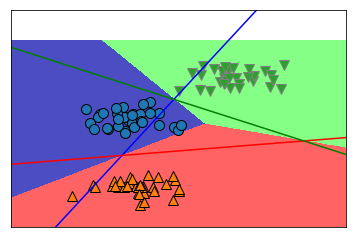

In [13]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
import numpy as np
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line*coef[0] + intercept)/coef[1], c=color)
plt.ylim(-10, 15)   

In [ ]:
# 线性模型的主要参数是正则化参数，回归模型中(岭回归，Lasso)中是alpha，较大的化，模型比较简单，其中岭回归的各个系数会趋于0
# 使得各个特征对模型影响最小，Lasso中会使得某些特征的系数为0，这样导致只有少数特征会对模型造成影响，所以模型会比较简单
# 在分类模型中LinearSVC和LogisticRegression中，系数是C，C越小，模型越简单，会使得模型更加强调使得系数向量接近于0，所以是L2正则化

# 如果数据集中包含高度相关的特征，可能不能完全弄清楚系数为什么是这样的
# 如果特征数量大于样本数量，那么线性模型的表现都会比较好